# Dog or Cat Prediction using CNN Model

### Importing the libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [ ]:
tf.__version__

'2.7.0'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random 

##**Step 1:** Loading and preprocessing own Dataset

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1160 images belonging to 3 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 1160 images belonging to 2 classes.


##**Step 2:** Designing and Training a CNN Model in Keras

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
37/37 [==============================] - 45s 1s/step - loss: 0.0226 - accuracy: 0.9802 - val_loss: 53.6452 - val_accuracy: 0.1379
Epoch 2/25
37/37 [==============================] - 17s 454ms/step - loss: 8.3850e-15 - accuracy: 1.0000 - val_loss: 56.6521 - val_accuracy: 0.1379
Epoch 3/25
37/37 [==============================] - 17s 453ms/step - loss: 2.8081e-14 - accuracy: 1.0000 - val_loss: 56.7356 - val_accuracy: 0.1379
Epoch 4/25
37/37 [==============================] - 17s 451ms/step - loss: 3.7994e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 5/25
37/37 [==============================] - 17s 456ms/step - loss: 3.1685e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 6/25
37/37 [==============================] - 17s 455ms/step - loss: 3.2262e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 7/25
37/37 [==============================] - 17s 449ms/step - loss: 7.3634e-15 - accuracy: 1.0000 - val_loss: 56

##**Step 3:** Plotting the Loss and Accuracy Curve

In [ ]:
history=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)
    

Epoch 1/25
37/37 [==============================] - 17s 461ms/step - loss: 7.7074e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 2/25
37/37 [==============================] - 17s 457ms/step - loss: 5.0909e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 3/25
37/37 [==============================] - 17s 457ms/step - loss: 2.3643e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 4/25
37/37 [==============================] - 17s 460ms/step - loss: 1.4279e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 5/25
37/37 [==============================] - 17s 454ms/step - loss: 5.1803e-14 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 6/25
37/37 [==============================] - 17s 452ms/step - loss: 3.1142e-13 - accuracy: 1.0000 - val_loss: 56.7375 - val_accuracy: 0.1379
Epoch 7/25
37/37 [==============================] - 17s 456ms/step - loss: 2.0389e-13 - accuracy: 1.0000 - val_l

In [ ]:
history.history??

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

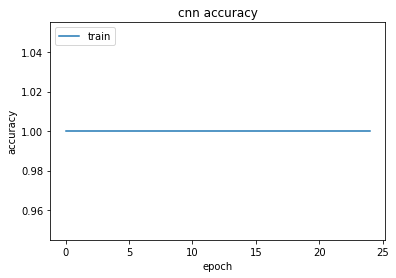

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.title("cnn accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

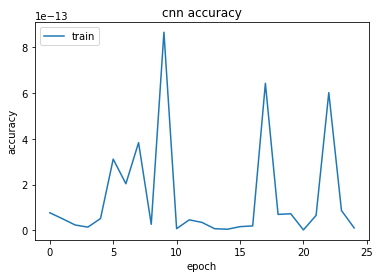

In [ ]:
plt.plot(history.history["loss"])
plt.title("cnn accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc='upper left')
plt.show()

## Part 4 - Making a single prediction

##**Step 4:** Evaluating the Model and Predicting the Output Class of a Test image

In [56]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
#tensorboard = TensorBoard(log_dir="logs/{}".format(time())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/test_set',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Setog'
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/test_set/dog',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set /no output available
test_set1 = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset/test_set/cat',
                                            target_size=(64,64),
                                            batch_size=32,
                                            shuffle=False)


Found 1156 images belonging to 2 classes.
Found 156 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.


In [74]:
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
   prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)
    


dog


In [41]:
print(prediction)

dog


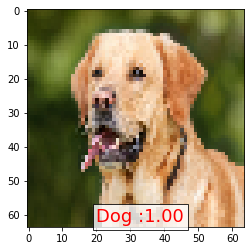

In [75]:
#Prediction of Single Image
#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
test_image1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_1.jpg', target_size = (64, 64))
test_image= image.img_to_array(test_image1)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
test_image = test_image/255
# create a batch of size 1 [N,H,W,C]
test_image = np.expand_dims(test_image, axis=0)
if(result[:,:]>0.5):
    value ='Dog :%1.2f'%(result[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='Cat :%1.2f'%(1.0-result[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(test_image1)
plt.show()


In [76]:
import pandas as pd
test_set.reset
ytesthat = cnn.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)
df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


,filename,predict,y,y_pred
0,dogs/dog.4002.jpg,1.00000,0,1
1,dogs/dog.4003.jpg,1.00000,0,1
2,dogs/dog.4004.jpg,1.00000,0,1
3,dogs/dog.4005.jpg,1.00000,0,1
4,dogs/dog.4006.jpg,1.00000,0,1
5,dogs/dog.4007.jpg,1.00000,0,1
6,dogs/dog.4010.jpg,1.00000,0,1
7,dogs/dog.4011.jpg,1.00000,0,1
8,dogs/dog.4012.jpg,1.00000,0,1
9,dogs/dog.4013.jpg,1.00000,0,1


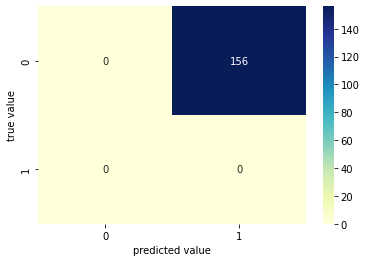

In [90]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

In [91]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

##**Step 5:** Visualizing the Intermediate Layer Output of CNN




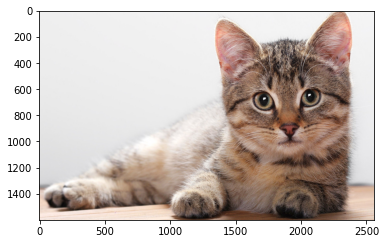

In [93]:
#Visualization of Layers Ouptut
#Input Image for Layer visualization
test_image1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_2.jpg')
plt.imshow(test_image1);
#preprocess image
test_image1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_2.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image1)
test_image = test_image/255
test_image= np.expand_dims(test_image, axis=0)

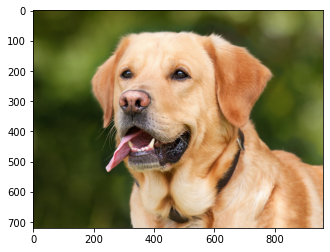

In [94]:
#Visualization of Layers Ouptut
#Input Image for Laer visualization
test_image1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_1.jpg')
plt.imshow(test_image1);
#preprocess image
test_image1 = image.load_img('/content/drive/MyDrive/Colab Notebooks/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image1)
test_image = test_image/255
test_image= np.expand_dims(test_image, axis=0)

In [95]:
model_layers = [ layer.name for layer in cnn.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [103]:
from tensorflow.keras.models import Model
conv2d_output = Model(inputs=cnn.input, outputs=cnn.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=cnn.input,outputs=cnn.get_layer('conv2d_1').output)
conv2d_features = conv2d_output.predict(test_image)
conv2d_1_features = conv2d_1_output.predict(test_image)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('First conv layer feature output shape : ',conv2d_1_features.shape)


First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 29, 29, 32)


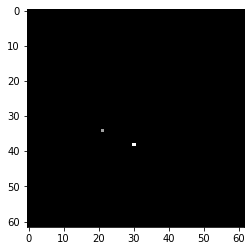

In [104]:
#Single Convolution Filter Output
plt.imshow(conv2d_features[0, :, :, 4], cmap='gray')

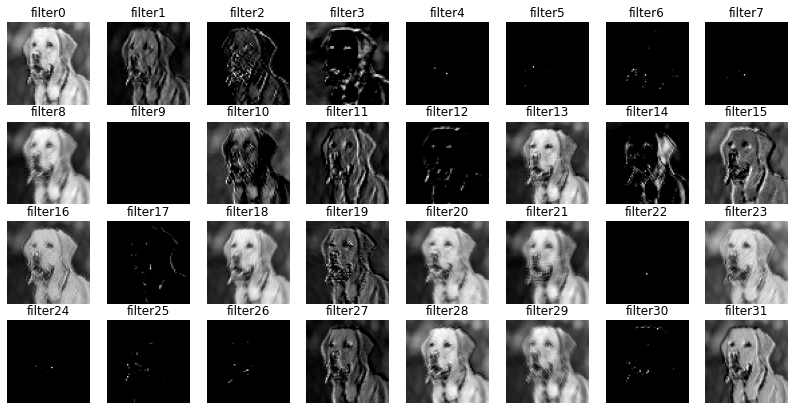

In [105]:
#First Covolution Layer Output
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

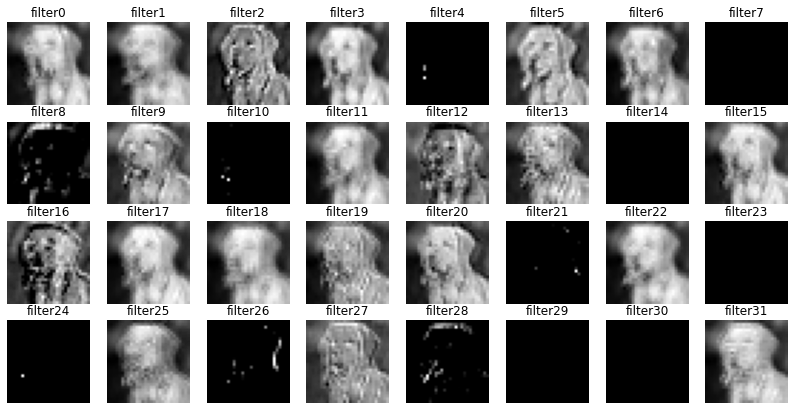

In [107]:
#Second Covolution Layer Output
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

##**Step 6:** Plotting the Confusion Matrix for Result

In [77]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 1156 Validation images : %d'%misclassified['y'].count())

Total misclassified image from 1156 Validation images : 156


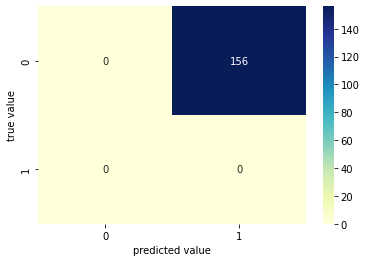

In [117]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');